In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [7]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

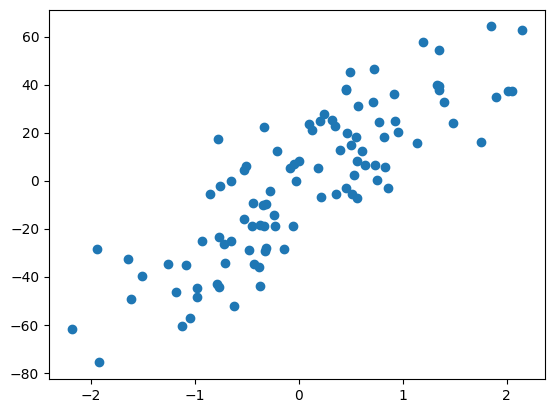

In [8]:
plt.scatter(X,y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test)

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

68.20980909818857

In [16]:
# intercept and the cfficient for the model
lr.coef_ , lr.intercept_

(array([26.84461765]), -1.2624275567282277)

# let's apply the ridge regression

In [33]:
from sklearn.linear_model import Ridge

r = Ridge(alpha = 10)

In [34]:
r.fit(X_train,y_train)

Ridge(alpha=10)

In [35]:
y_pred1 = r.predict(X_test)

In [36]:
r2_score(y_test,y_pred1)*100

64.69783155801115

In [37]:
r.coef_,r.intercept_

(array([23.47372657]), -0.9493614704301478)

In [38]:
rr2 = Ridge(alpha = 100)

In [39]:
rr2.fit(X_train,y_train)

Ridge(alpha=100)

In [40]:
y_pred2 = rr2.predict(X_test)

In [43]:
r2_score(y_test,y_pred2)*100

36.64396664499361

# now let's compare the perfomance of the model by visulization

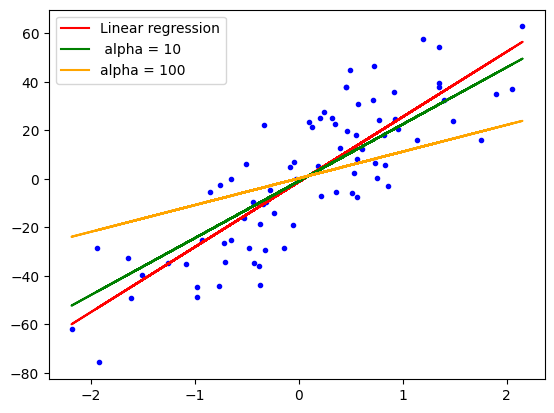

In [47]:
plt.plot(X_train,y_train,'b.')
plt.plot(X_train,lr.predict(X_train),color='r',label = 'Linear regression')
plt.plot(X_train,r.predict(X_train),color = 'g',label = ' alpha = 10')
plt.plot(X_train,rr2.predict(X_train),color = 'orange' , label = "alpha = 100")
plt.legend()
plt.show()

# Create our own ridge regression class from scratch

In [59]:
class meroRidge:
  def __init__(self,alpha = 0.1):
    self.alpha  = alpha
    self.coef_ = None
    self.intercept_ = None

  def fit(self,X_train,y_train):
    num =0
    den = 0

    for i in range (X_train.shape[0]):
      num += (y_train[i]-y_train.mean())*(X_train[i]-X_train.mean())
      den += (X_train[i]-X_train.mean())*(X_train[i]-X_train.mean())

    self.coef_ = num/(den+self.alpha)

    self.intercept_ = y_train.mean() - self.coef_ * X_train.mean()

    print(self.coef_,self.intercept_)

  def predict(self,X_test):
    return self.coef_ * X_test + self.intercept_



In [60]:
ll = meroRidge(alpha = 10)

In [61]:
ll.fit(X_train,y_train)

[23.47372657] [-0.94936147]


In [63]:
y_pred3 = ll.predict(X_test)

In [66]:
r2_score(y_test,y_pred3)*100

64.69783155801116